# Rolling return distribution through time

In [10]:
library(DBI)
library(plutoDbR)
library(plutoR)
library(tidyverse)
options("scipen"=999)
options(stringsAsFactors = FALSE)
source("/usr/share/pluto/config.R")
source("/usr/share/pluto/goofy/plot.common.R")

library(ggthemes)
library(quantmod)
library(lubridate)
library(PerformanceAnalytics)

options(repr.plot.width=16, repr.plot.height=8)

#initialize
famaFrench <- FamaFrench()

In [8]:
dailyRets <- famaFrench$FiveFactor3x2Daily() %>%
    inner_join(famaFrench$FiveFactor3x2Daily(), by=c('TIME_STAMP')) %>%
    filter(KEY_ID.x == 'MKT-RF' & KEY_ID.y == 'RF') %>%
    mutate(MKT = (RET.x + RET.y)/100) %>%
    select(TIME_STAMP, MKT) %>%
    collect() %>%
    mutate(TIME_STAMP = as.Date(TIME_STAMP))
    
dailyRetXts <- xts(dailyRets$MKT, dailyRets$TIME_STAMP)

In [11]:
rollWindow <- 220 # ~year
rollRets <- rollapply(dailyRetXts, rollWindow, Return.cumulative)
rollRets <- na.omit(rollRets)
rollRets <- 100 * rollRets
names(rollRets) <- c('RET')
rollRets$Y <- year(index(rollRets))

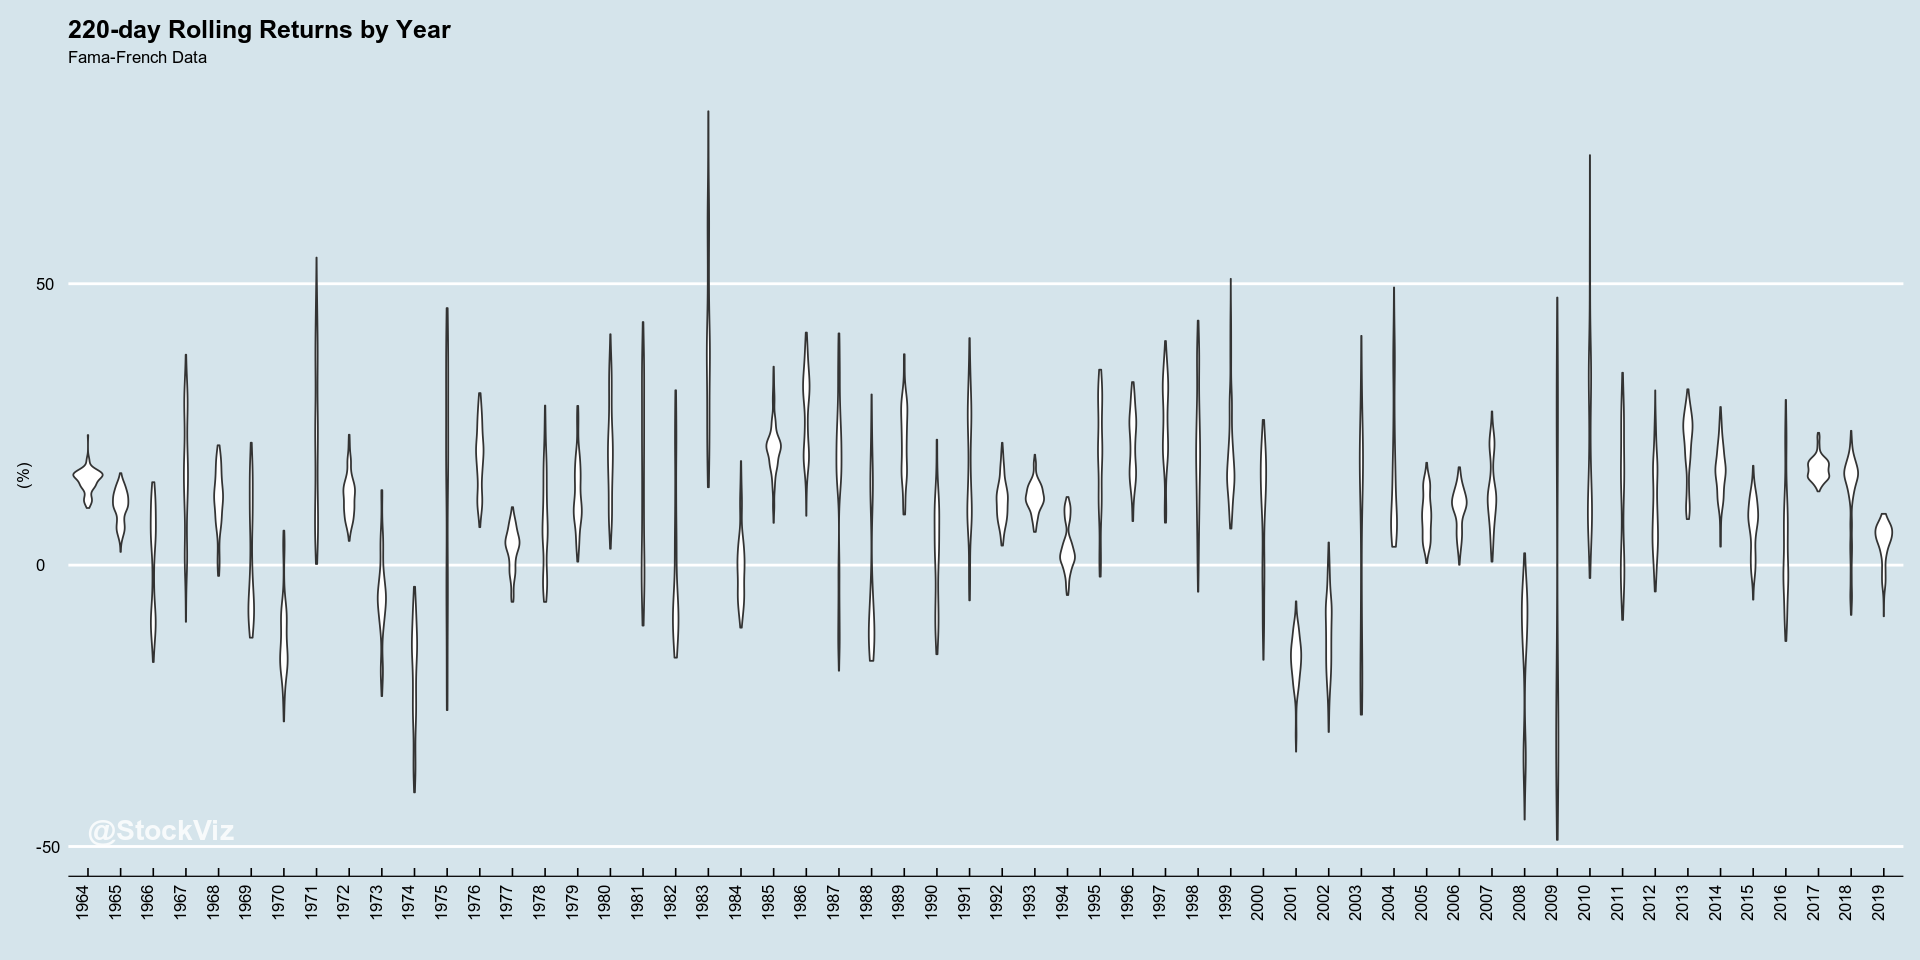

In [20]:
toPlot <- data.frame(rollRets)
toPlot$Y <- factor(toPlot$Y, levels = unique(toPlot$Y))

ggplot(toPlot, aes(x=Y, y=RET)) +
    theme_economist() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    geom_violin(aes(group=Y)) +
    labs(x='', y='(%)', fill='', title=sprintf("%d-day Rolling Returns by Year", rollWindow), subtitle="Fama-French Data") +
    annotate("text", x=1, y=min(toPlot$RET), 
                 label = "@StockViz", hjust=0, vjust=0, 
                 col="white", cex=6, fontface = "bold", alpha = 0.8)  
    

This notebook was created using [pluto](https://pluto.studio). Thank you for playing fair!